Just a quick visualization of the data inside of the hdf5 files, particularly to get a feeling for the difference between real and synthetic datasets

In [3]:
from skimage.io import imread
from glob import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import h5py
import numpy as np
from skimage.color import rgb2gray
from skimage.util.montage import montage2d
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
try:
    from tqdm import tqdm
except ImportError:
    print('Missing tqdm...')
    tqdm = lambda x: x
data_dir = os.path.join('.', 'eye_data')

In [4]:
# load the data file and extract dimensions
with h5py.File(os.path.join(data_dir,'gaze.h5'),'r') as t_file:
    print(list(t_file.keys()))
    assert 'image' in t_file, "Images are missing"
    assert 'look_vec' in t_file, "Look vector is missing"
    look_vec = t_file['look_vec'].value
    assert 'path' in t_file, "Paths are missing"
    print('Images found:',len(t_file['image']))
    for _, (ikey, ival) in zip(range(1), t_file['image'].items()):
        print('image',ikey,'shape:',ival.shape)
        img_width, img_height = ival.shape
    syn_image_stack = np.stack([a for a in t_file['image'].values()],0)

['image', 'look_vec', 'path']
Images found: 50000
image ..\..\..\..\Downloads\UnityEyes_Windows\UnityEyes_Windows\imgs\1.jpg shape: (35, 55)


## Synthetic Eyes
Here is a montage of 64 synthetic (UnityEyes) eyes.

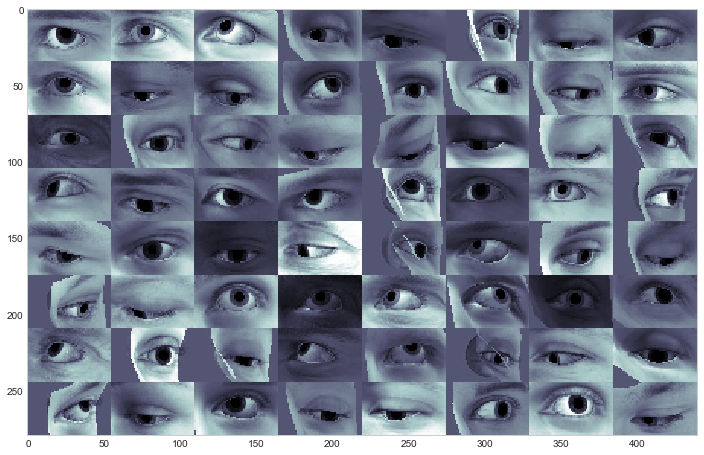

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(12,12))
ax1.imshow(montage2d(syn_image_stack[np.random.choice(range(syn_image_stack.shape[0]), size = 64),:,:]),
           cmap='bone')
fig.savefig('unityeyes.png')

### LookVec
Here we show visually what each component of the look_vec means (50000 x 4), the functions are the minimum, maximum, and then two random values

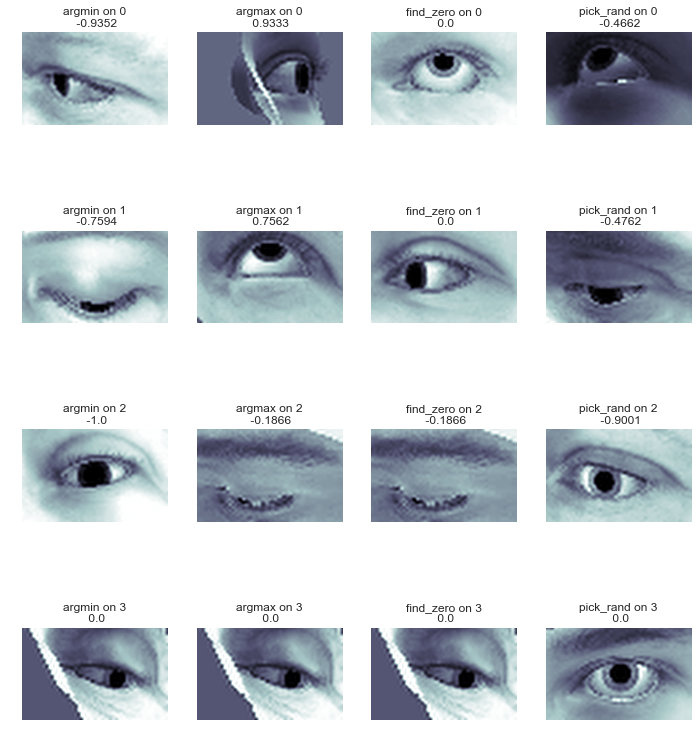

In [7]:
def find_zero(x):
    return np.argmin(np.abs(x))
def pick_rand(x):
    return np.random.choice(range(x.shape[0]))
func_list = [np.argmin, np.argmax, find_zero, pick_rand]
fig, m_axs = plt.subplots(look_vec.shape[1], len(func_list), figsize = (12, 14))
for c_func, n_axs in zip(func_list, m_axs.T):
    for col_idx, c_ax in enumerate(n_axs):
        show_idx = c_func(look_vec[:,col_idx])
        c_ax.imshow(syn_image_stack[show_idx], cmap = 'bone', interpolation='lanczos')
        c_ax.set_title('{} on {}\n {}'.format(c_func.__name__, col_idx, look_vec[show_idx, col_idx]))
        c_ax.axis('off')

In [9]:
# load the data file and extract dimensions
with h5py.File(os.path.join(data_dir,'real_gaze.h5'),'r') as t_file:
    print(list(t_file.keys()))
    assert 'image' in t_file, "Images are missing"
    print('Images found:',len(t_file['image']))
    for _, (ikey, ival) in zip(range(1), t_file['image'].items()):
        print('image',ikey,'shape:',ival.shape)
        img_width, img_height = ival.shape
    real_image_stack = np.stack([a for a in t_file['image'].values()],0)

['image']
Images found: 34100
image ..\data\MPIIGaze_Dataset\000055ed-890a-411f-be6e-b8453b495389.png shape: (35, 55)


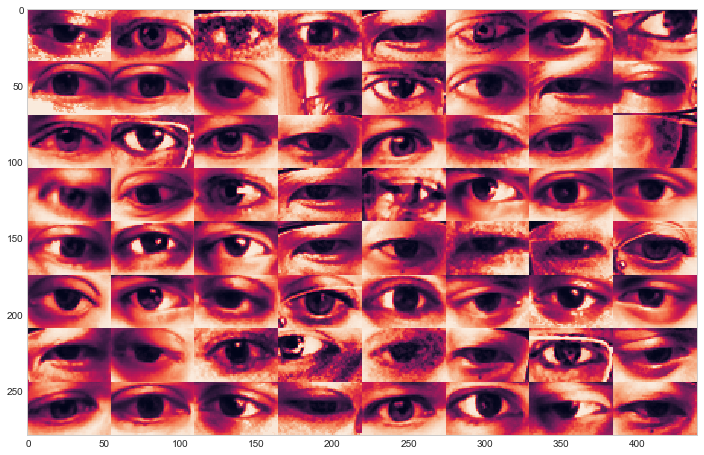

In [10]:
fig, ax1 = plt.subplots(1,1,figsize=(12,12))
ax1.imshow(montage2d(real_image_stack[np.random.choice(range(real_image_stack.shape[0]), size = 64)]))
fig.savefig('realeyes.png')